In [32]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
# Importing data with pandas
data = pd.read_csv('pendulum_data.csv')
data

,t,x,y,v_{x},v_{y},v,a_{x},a_{y},a,Ep,Ec,Em
0,0.000000,0.209597,0.049746,NaN,NaN,NaN,NaN,NaN,NaN,0.026813,NaN,NaN
1,0.033333,0.204034,0.046725,-0.239182,-0.119857,0.267532,NaN,NaN,NaN,0.025185,0.001968,0.027153
2,0.066667,0.193651,0.041756,-0.378555,-0.171779,0.415707,-4.097624,-1.255860,4.285756,0.022506,0.004752,0.027259
3,0.100000,0.178797,0.035273,-0.511751,-0.204469,0.551087,-3.914980,-0.643335,3.967487,0.019012,0.008352,0.027364
4,0.133333,0.159535,0.028125,-0.639986,-0.214298,0.674911,-3.513711,-0.082488,3.514679,0.015159,0.012526,0.027686
...,...,...,...,...,...,...,...,...,...,...,...,...
122,4.070000,0.202123,0.045778,-0.051528,-0.028320,0.058798,-3.769369,-1.700771,4.135307,0.024675,0.000095,0.024770
123,4.103333,0.197966,0.043802,-0.186788,-0.081774,0.203904,-3.856955,-1.589193,4.171526,0.023609,0.001143,0.024753
124,4.136667,0.189671,0.040327,-0.307546,-0.132261,0.334779,-2.886710,-2.565852,3.862213,0.021736,0.003082,0.024818
125,4.170000,0.177462,0.034984,-0.384530,-0.245454,0.456192,NaN,NaN,NaN,0.018857,0.005723,0.024580


In [34]:
# Saving and recollecting the data

#Cinematics data
t = np.array(data['t'])
y = np.array(data['y'])
v = np.array(data.loc[1:125,'v'])
t_v = np.array(data.loc[1:125,'t'])

#Energies data
Ep = np.array(data['Ep'])
K = np.array(data.loc[1:125, 'Ec'])
E = np.array(data.loc[1:125, 'Em'])

m=0.055

In [36]:
# Creating the data for the fits
time = np.linspace(0,t[-1],1000) #Time data

#y(t)
r1 = 0.5040063398774827
theta01 = 0.4367838580514395
theta_vel01= -0.19582000901052912
g1 = 10.77329368107787
y_fit = r1-r1*(np.cos( np.sqrt(theta01**2+(theta_vel01**2*r1/g1))*np.cos( np.sqrt(g1/r1)*time + np.arctan(-theta_vel01/np.sqrt(g1/r1)/theta01) ) ))

#v(t)
r2=0.5641936827307837
w2=4.6182041594830965
theta02=0.37619502963600554
theta_vel02=-0.19159503481590928
v_fit = abs(r2*np.sqrt(theta02**2+(theta_vel02**2/w2**2))*w2*np.sin(w2*time+np.arctan(-theta_vel02/theta02/w2)))

#Ep(t)
r3 = 0.5250988553913964
theta03 = 0.3995549358409757
theta_vel03 = -0.17904101579403875
g3 = 11.224258099216689
Ep_fit = 0.055*g3*(r3-r3*(np.cos( np.sqrt(theta03**2+(theta_vel03**2*r3/g3))*np.cos( np.sqrt(g3/r3)*time + np.arctan(-theta_vel03/np.sqrt(g3/r3)/theta03) ) )))


#Ec(t)
r4 = 0.4988964175357348
theta04 = 0.4241340596008783
theta_vel04 = -0.23120306969818707
g4 = 10.634168749678976
Ec_fit = 1/2*0.055*r4*g4*(theta04**2+(theta_vel04**2*r4/g4))* (np.sin( np.sqrt(g4/r4)*time + np.arctan(-theta_vel04/theta04/np.sqrt(g4/r4)))**2)


#Em
y05 = np.array([0.049222101560494336, 5.143e-2, 4.912e-2, 4.746e-2])
v05 = np.array([0.0, 0., 0., 0.])
g5 = np.array([9.721630154323709, 9.924, 9.718, 9.495])
Em_fits = 0.055*g5*y05 + 1/2*0.055*v05**2

In [42]:
# Cerating the theoretic data

#Parameters
r6 = 0.472
g6 = 9.8
theta06 = 26.5*np.pi/180
theta_vel06 =-0.19582000901052912
w6 = np.sqrt(g6/r6)
y06 = r6 - r6*np.cos(theta06)
v06 = theta_vel06*r6


#Data

y_theory =  r6-r6*(np.cos( np.sqrt(theta06**2+(theta_vel06**2*r6/g6))*np.cos( np.sqrt(g6/r6)*time + np.arctan(-theta_vel06/np.sqrt(g6/r6)/theta06) ) ))
v_theory = abs(r6*np.sqrt(theta06**2+(theta_vel06**2/w6**2))*w6*np.sin(w6*time+np.arctan(-theta_vel06/theta06/w6)))
Ep_theory = 0.055*g6*(r6-r6*(np.cos( np.sqrt(theta06**2+(theta_vel06**2*r6/g6))*np.cos( np.sqrt(g6/r6)*time + np.arctan(-theta_vel06/np.sqrt(g6/r6)/theta06) ) )))
K_theory = 1/2*0.055*r6*g6*(theta06**2+(theta_vel06**2*r6/g6))* (np.sin( np.sqrt(g6/r6)*time + np.arctan(-theta_vel06/theta06/np.sqrt(g6/r6)))**2)
E_theory = (0.055*g6*y06 + 1/2*0.055*v06**2)*np.ones(len(time))

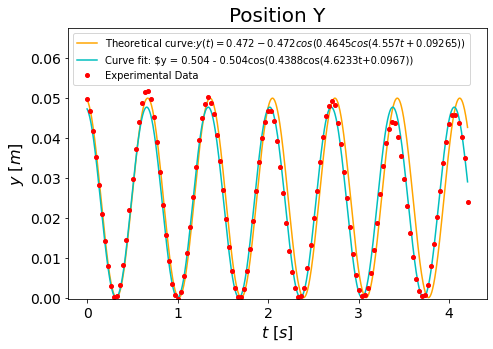

In [48]:
plt.figure(figsize=(7.5, 5))
plt.plot(time, y_theory,'orange',label=R'Theoretical curve:$y(t) = 0.472 - 0.472cos(0.4645cos(4.557t+0.09265))$')
plt.plot(time, y_fit,'c',label=R'Curve fit: $y = 0.504 - 0.504cos(0.4388cos(4.6233t+0.0967))')
plt.plot(t, y,'or',label=R'Experimental Data',markersize=4)

#Ponemos un título y ajustamos el tamaño, los límites de los ejes, y la pocisión de la leyenda
plt.title('Position Y', fontsize = 20)
plt.ylim(min(y), max(y)+0.016)
plt.legend(fontsize = 10, loc='upper left')

#Agregamos un nombre y tamño de letra a las etiquetas de los ejes
plt.ylabel('$y$ [$m$]', fontsize = 16)
plt.xlabel('$t$ [$s$]', fontsize = 16)

#Modificamos el tamaño de los valores en los ejes
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.savefig('pendulum_y.png', format='png') #Se guarda la figura en el computador
plt.show() #mostramos todo lo que graficamos

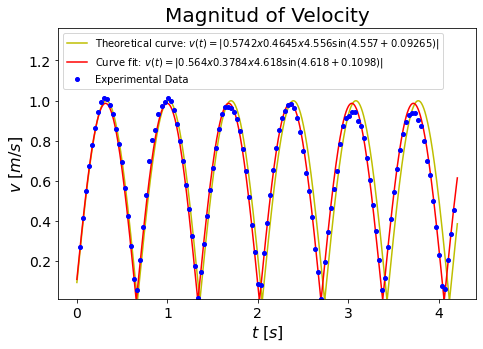

In [49]:
plt.figure(figsize=(7.5, 5))
plt.plot(time, v_theory,'y',label=R'Theoretical curve: $v(t) = |0.5742x 0.4645 x 4.556\sin(4.557 + 0.09265)|$')
plt.plot(time, v_fit,'r',label=R'Curve fit: $v(t) = |0.564x0.3784x4.618\sin(4.618 + 0.1098)|$')
plt.plot(t_v, v,'ob',label=R'Experimental Data', markersize=4)

#Ponemos un título y ajustamos el tamaño, los límites de los ejes, y la pocisión de la leyenda
plt.title('Magnitud of Velocity', fontsize = 20)
plt.ylim(min(v), max(v)+0.35)
plt.legend(fontsize = 10, loc='upper left')

#Agregamos un nombre y tamño de letra a las etiquetas de los ejes
plt.ylabel('$v$ [$m/s$]', fontsize = 16)
plt.xlabel('$t$ [$s$]', fontsize = 16)

#Modificamos el tamaño de los valores en los ejes
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.savefig('pendulum_v.png', format='png') #Se guarda la figura en el computador
plt.show() #mostramos todo lo que graficamos

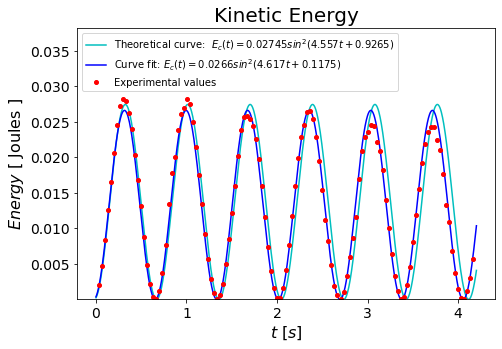

In [50]:
plt.figure(figsize=(7.5, 5))
plt.plot(time, K_theory,'c',label=R'Theoretical curve:  $E_c(t) = 0.02745 sin^2(4.557t + 0.9265)$' )
plt.plot(time, Ec_fit,'b',label=R'Curve fit: $E_c(t) = 0.0266 sin^2(4.617t + 0.1175)$')
plt.plot(t_v, K,'or',label=R'Experimental values',markersize=4)

#Ponemos un título y ajustamos el tamaño, los límites de los ejes, y la pocisión de la leyenda
plt.title('Kinetic Energy', fontsize = 20)
plt.ylim(min(K), max(K)+0.01)
plt.legend(fontsize = 10, loc='upper left')

#Agregamos un nombre y tamño de letra a las etiquetas de los ejes
plt.ylabel('$Energy$ $[$ Joules $]$', fontsize = 16)
plt.xlabel('$t$ [$s$]', fontsize = 16)

#Modificamos el tamaño de los valores en los ejes
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.savefig('pendulum_K.png', format='png') #Se guarda la figura en el computador
plt.show() #mostramos todo lo que graficamos

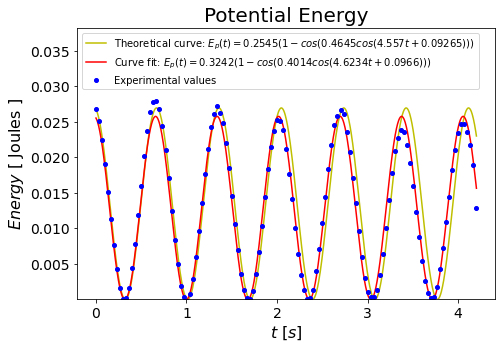

In [51]:
plt.figure(figsize=(7.5, 5))
plt.plot(time, Ep_theory,'y',label='Theoretical curve: $E_p(t) = 0.2545(1 - cos(0.4645cos(4.557t+0.09265))) $' )
plt.plot(time, Ep_fit,'r',label='Curve fit: $E_p(t) = 0.3242(1 - cos(0.4014cos(4.6234t+0.0966))) $')
plt.plot(t, Ep,'ob',label='Experimental values', markersize=4)

#Ponemos un título y ajustamos el tamaño y pocisión de la leyenda
plt.title('Potential Energy', fontsize = 20)
plt.ylim(min(K), max(K)+0.01)
plt.legend(fontsize = 10, loc='upper left')

#Agregamos un nombre y tamño de letra a las etiquetas de los ejes
plt.ylabel('$Energy$ $[$ Joules $]$', fontsize = 16)
plt.xlabel('$t$ [$s$]', fontsize = 16)

#Modificamos el tamaño de los valores en los ejes
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.savefig('pendulum_Ep.png', format='png') #Se guarda la figura en el computador
plt.show() #mostramos todo lo que graficamos

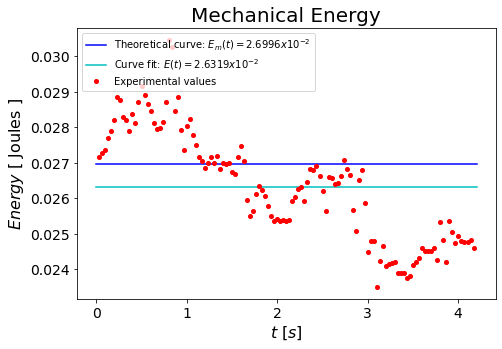

In [52]:
plt.figure(figsize=(7.5, 5))
plt.plot(time, E_theory,'b',label='Theoretical curve: $E_m(t) = 2.6996x10^{-2}$')
plt.plot(time, Em_fits[0]*np.ones(len(E_theory)),'c',label='Curve fit: $E(t) = 2.6319x10^{-2}$')
plt.plot(t_v, E,'or',label='Experimental values', markersize=4)

#Ponemos un título y ajustamos el tamaño y pocisión de la leyenda
plt.title('Mechanical Energy', fontsize = 20)
#plt.ylim(min(K), max(K)+0.01)
plt.legend(fontsize = 10, loc='upper left')

#Agregamos un nombre y tamño de letra a las etiquetas de los ejes
plt.ylabel('$Energy$ $[$ Joules $]$', fontsize = 16)
plt.xlabel('$t$ [$s$]', fontsize = 16)

#Modificamos el tamaño de los valores en los ejes
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.savefig('pendulum_E.png', format='png') #Se guarda la figura en el computador
plt.show() #mostramos todo lo que graficamos

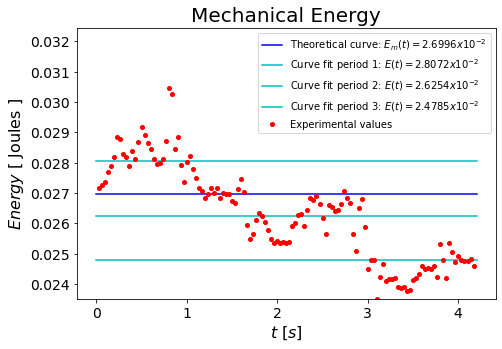

In [53]:
plt.figure(figsize=(7.5, 5))
plt.plot(time, E_theory,'b',label='Theoretical curve: $E_m(t) = 2.6996x10^{-2}$')
plt.plot(time, Em_fits[1]*np.ones(len(E_theory)),'c',label='Curve fit period 1: $E(t) = 2.8072x10^{-2}$')
plt.plot(time, Em_fits[2]*np.ones(len(E_theory)),'c',label='Curve fit period 2: $E(t) = 2.6254x10^{-2}$')
plt.plot(time, Em_fits[3]*np.ones(len(E_theory)),'c',label='Curve fit period 3: $E(t) = 2.4785x10^{-2}$')
plt.plot(t_v, E,'or',label='Experimental values', markersize=4)

#Ponemos un título y ajustamos el tamaño y pocisión de la leyenda
plt.title('Mechanical Energy', fontsize = 20)
plt.ylim(min(E), max(E)+0.002)
plt.legend(fontsize = 10, loc='upper right')

#Agregamos un nombre y tamño de letra a las etiquetas de los ejes
plt.ylabel('$Energy$ $[$ Joules $]$', fontsize = 16)
plt.xlabel('$t$ [$s$]', fontsize = 16)

#Modificamos el tamaño de los valores en los ejes
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.savefig('pendulum_E123.png', format='png') #Se guarda la figura en el computador
plt.show() #mostramos todo lo que graficamos

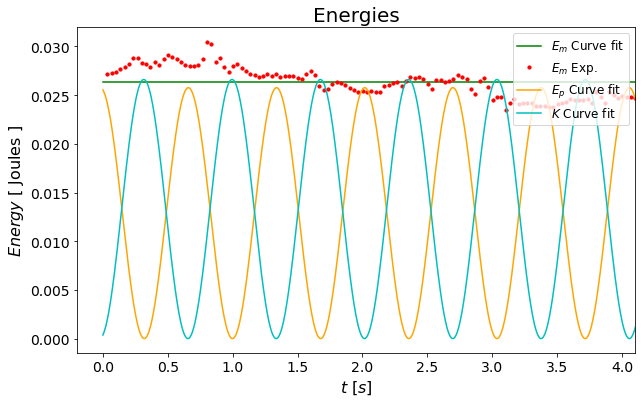

In [54]:
plt.figure(figsize=(10,6))
#plt.plot(time, E_theory,'g',label='$E_m$ Theory')
plt.plot(time, Em_fits[0]*np.ones(len(E_theory)),'g',label='$E_m$ Curve fit' )
plt.plot(t_v, E,'or',label='$E_m$ Exp.', markersize=3.2)
#plt.plot(time, Ep_theory,'y',label='$E_p$ Theory')
plt.plot(time, Ep_fit,'orange',label='$E_p$ Curve fit')
#plt.plot(time, K_theory,'b',label='$K$ Theory' )
plt.plot(time, Ec_fit,'c',label='$K$ Curve fit')


#Ponemos un título y ajustamos el tamaño y pocisión de la leyenda
plt.title('Energies', fontsize = 20)
plt.legend(fontsize = 12, loc='upper right')
plt.xlim(-0.2, 4.1)

#Agregamos un nombre y tamño de letra a las etiquetas de los ejes
plt.ylabel('$Energy$ $[$ Joules $]$', fontsize = 16)
plt.xlabel('$t$ [$s$]', fontsize = 16)

#Modificamos el tamaño de los valores en los ejes
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.savefig('pendulum_Energies.png', format='png') #Se guarda la figura en el computador
plt.show() #mostramos todo lo que graficamos

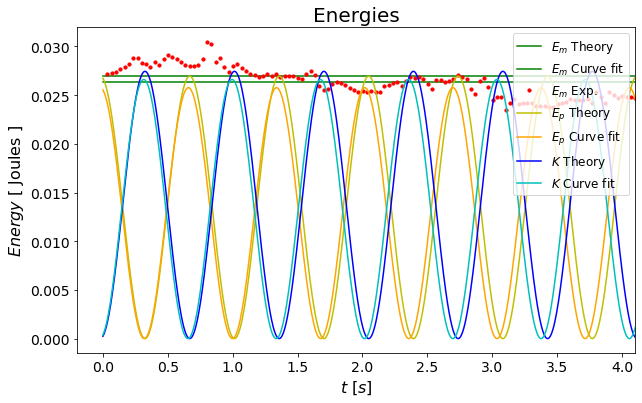

In [55]:
plt.figure(figsize=(10,6))
plt.plot(time, E_theory,'g',label='$E_m$ Theory')
plt.plot(time, Em_fits[0]*np.ones(len(E_theory)),'g',label='$E_m$ Curve fit' )
plt.plot(t_v, E,'or',label='$E_m$ Exp.', markersize=3.2)
plt.plot(time, Ep_theory,'y',label='$E_p$ Theory')
plt.plot(time, Ep_fit,'orange',label='$E_p$ Curve fit')
plt.plot(time, K_theory,'b',label='$K$ Theory' )
plt.plot(time, Ec_fit,'c',label='$K$ Curve fit')


#Ponemos un título y ajustamos el tamaño y pocisión de la leyenda
plt.title('Energies', fontsize = 20)
plt.legend(fontsize = 12, loc='upper right')
plt.xlim(-0.2, 4.1)

#Agregamos un nombre y tamño de letra a las etiquetas de los ejes
plt.ylabel('$Energy$ $[$ Joules $]$', fontsize = 16)
plt.xlabel('$t$ [$s$]', fontsize = 16)

#Modificamos el tamaño de los valores en los ejes
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.savefig('pendulum_Energies2.png', format='png') #Se guarda la figura en el computador
plt.show() #mostramos todo lo que graficamos

In [64]:
# Encontrando la desviación estándar de las diferencias entre el modelo teórico (ecuaciones teóricas) y experimental (ecuaciones de ajuste)

# Se calculan los valores experimentales
y_e = r1-r1*(np.cos( np.sqrt(theta01**2+(theta_vel01**2*r1/g1))*np.cos( np.sqrt(g1/r1)*t + np.arctan(-theta_vel01/np.sqrt(g1/r1)/theta01) ) ))
v_e = abs(r2*np.sqrt(theta02**2+(theta_vel02**2/w2**2))*w2*np.sin(w2*t+np.arctan(-theta_vel02/theta02/w2)))
Ep_e= 0.055*g3*(r3-r3*(np.cos( np.sqrt(theta03**2+(theta_vel03**2*r3/g3))*np.cos( np.sqrt(g3/r3)*t + np.arctan(-theta_vel03/np.sqrt(g3/r3)/theta03) ) )))
Ec_e = 1/2*0.055*r4*g4*(theta04**2+(theta_vel04**2*r4/g4))* (np.sin( np.sqrt(g4/r4)*t + np.arctan(-theta_vel04/theta04/np.sqrt(g4/r4)))**2)
Em_e = (0.055*g5[0]*y05[0] + 1/2*0.055*v05[0]**2)*np.ones(len(t))

# Se calculan los valores teóricos
y_t =  r6-r6*(np.cos( np.sqrt(theta06**2+(theta_vel06**2*r6/g6))*np.cos( np.sqrt(g6/r6)*t + np.arctan(-theta_vel06/np.sqrt(g6/r6)/theta06) ) ))
v_t = abs(r6*np.sqrt(theta06**2+(theta_vel06**2/w6**2))*w6*np.sin(w6*t+np.arctan(-theta_vel06/theta06/w6)))
Ep_t = 0.055*g6*(r6-r6*(np.cos( np.sqrt(theta06**2+(theta_vel06**2*r6/g6))*np.cos( np.sqrt(g6/r6)*t + np.arctan(-theta_vel06/np.sqrt(g6/r6)/theta06) ) )))
Ec_t = 1/2*0.055*r6*g6*(theta06**2+(theta_vel06**2*r6/g6))* (np.sin( np.sqrt(g6/r6)*t + np.arctan(-theta_vel06/theta06/np.sqrt(g6/r6)))**2)
Em_t = (0.055*g6*y06 + 1/2*0.055*v06**2)*np.ones(len(t))


def rms_desviation(xt, xe):
    """
    @params
    xt: datos teóricos
    xe: datos experimentales
    """
    
    #Se calculan las diferencias entre los puntos de ambos modelos
    dx = abs(xt-xe)
    
    #Se calcula el promedio de las diferencias
    N = np.size(xt)
    prom = np.sum(dx)/N

    # Se calcula la desviación estándar con el valor 'rms' (media cuadrática) y 'prom' (promedio)
    rms = np.sum(dx**2)/N
    desviacion = np.sqrt(rms-prom**2)
    
    return desviacion

print('desviación y = ', rms_desviation(y_t,y_e))
print('desviación v = ', rms_desviation(v_t,v_e))
print('desviación Ep = ', rms_desviation(Ep_t,Ep_e))
print('desviación Ec = ', rms_desviation(Ec_t,Ec_e))
print('desviación Em = ', rms_desviation(Em_t,Em_e))

desviación y =  0.0034695457489374837
desviación v =  0.06872125872307451
desviación Ep =  0.0018724723224011499
desviación Ec =  0.0018784737654070956
desviación Em =  2.300859821966427e-11
